# Packet Based Markovian Model for steady state throughput of CUBIC and Hybla

In this notebook, we investigate the adapted packet-based model for CUBIC and Hybla.

As before, we first print certain metrics to make sure the different steps in the computation are as wished.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ccaModels import CCA_MarkovChain_CUBIC_packet, CCA_MarkovChain_Hybla_packet, CCA_MarkovChain_Hybla_packet_new

#plt.rcParams['text.usetex'] = True
#plt.rcParams.update(plt.rcParamsDefault)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
wireless = CCA_MarkovChain_Hybla_packet_new(packet_err=0.1,beta=0.7,N=100,C = 1000,RTT_real=0.05, RTT0=0.025)
wireless.compute_tau_and_S()
print(f"pi = {wireless.compute_stationnary_distribution()}, sum pi = {sum(wireless.pi)}")
print(f"P= {wireless.P[0,:]}")
print(f"tau = {wireless.T(wireless.a[0],wireless.a[0])}")
print(f"S = {wireless.S[0,:]}")
print(wireless.avg_throughput())

pi = [2.51360259e-07 2.39001678e-06 2.51150897e-05 1.56111854e-05
 2.48306514e-04 1.64047519e-04 6.00052523e-04 2.00923475e-03
 1.72227079e-03 6.18922478e-03 5.43532041e-03 1.45015757e-02
 1.45817427e-02 2.11112110e-02 3.13536768e-02 3.24795414e-02
 4.47805997e-02 4.60561223e-02 5.50801846e-02 5.53947264e-02
 5.72883254e-02 5.90218699e-02 5.72199141e-02 5.67435332e-02
 5.34284168e-02 5.05142388e-02 4.62857902e-02 4.17543793e-02
 3.75135803e-02 3.32404987e-02 2.91398287e-02 2.52511555e-02
 2.16367442e-02 1.83704850e-02 1.53992339e-02 1.28372270e-02
 1.06163010e-02 8.69992834e-03 7.07568305e-03 5.70711304e-03
 4.56986758e-03 3.62955207e-03 2.86383603e-03 2.24385493e-03
 1.74537665e-03 1.34832641e-03 1.03432212e-03 7.88080569e-04
 5.96329044e-04 4.48245740e-04 3.34688129e-04 2.48226214e-04
 1.82881538e-04 1.33845591e-04 9.73126464e-05 7.02852271e-05
 5.04319537e-05 3.59498160e-05 2.54588912e-05 1.79118960e-05
 1.25200555e-05 8.69438646e-06 5.99850546e-06 4.11171369e-06
 2.80015197e-06 1.8

In [4]:
err_rates = [0.1]
bandwidths = [1000]
RTT = 0.5
throughputs = np.zeros([len(bandwidths),len(err_rates)])
sdistr = np.zeros([len(bandwidths),10])
for k,C in enumerate(bandwidths):
    #sdistr[k,:] = CCA_MarkovChain_Hybla_packet_new(packet_err=1e-3,beta=0.7,N=100,C = C,RTT_real=RTT, RTT0=0.025).compute_stationnary_distribution()
    for i, l in enumerate(err_rates):
        wireless = CCA_MarkovChain_Hybla_packet_new(packet_err=l,beta=0.7,N=10,C = C,RTT_real=RTT, RTT0=0.025)
        wireless.compute_stationnary_distribution()
        print(wireless.P.round(3))
        print(wireless.pi.round(3))
        #throughputs[k,i] = wireless.avg_throughput()

[[0.209 0.481 0.245 0.058 0.007 0.    0.    0.    0.    0.   ]
 [0.209 0.481 0.245 0.058 0.007 0.    0.    0.    0.    0.   ]
 [0.    0.421 0.457 0.108 0.013 0.001 0.    0.    0.    0.   ]
 [0.    0.    0.577 0.376 0.045 0.003 0.    0.    0.    0.   ]
 [0.    0.    0.577 0.376 0.045 0.003 0.    0.    0.    0.   ]
 [0.    0.    0.    0.69  0.291 0.018 0.001 0.    0.    0.   ]
 [0.    0.    0.    0.    0.773 0.219 0.007 0.    0.    0.   ]
 [0.    0.    0.    0.    0.773 0.219 0.007 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.834 0.163 0.003 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.879 0.12  0.001 0.   ]]
[0.104 0.395 0.367 0.119 0.014 0.001 0.    0.    0.    0.   ]


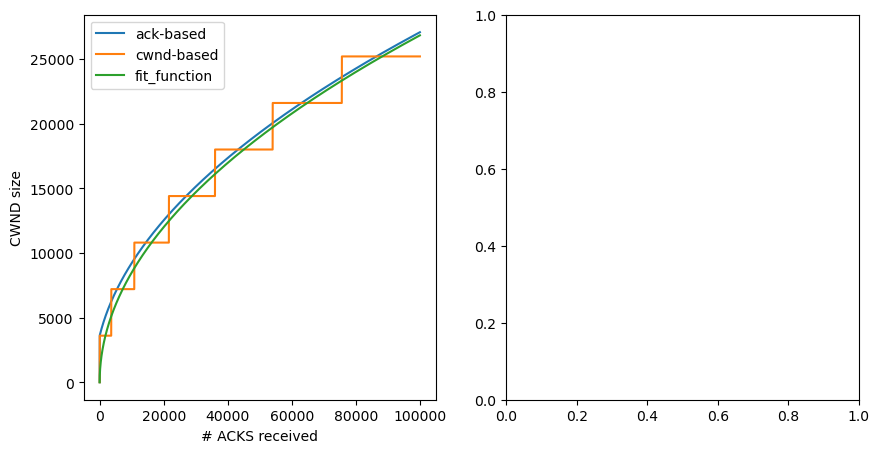

Integrating ack-based yields: 1833050388.4840612
error with fit-function = 240.55360568860124


In [17]:
# Example of the approximation for the difference equation nonlinear to linear non-difference equation.
# We can also add the continuous approximation to that.
T = 100000
rho = 60
alpha = rho**2
start = 1
w = np.zeros(T)
wp = np.zeros(T)
wt = np.zeros(T)
fit_function = np.sqrt(2*alpha*np.arange(T)+start*start)
w[0] = start
wp[0] = start
wt[0] = 1
counter = 1
rtt_counter = 0
for t in range(1,T):
    w[t] = w[t-1] + alpha/w[t-1]
    wt[t] = wt[0] + alpha * rtt_counter
    if counter == wp[t-1]:
        wp[t] = wp[t-1] + alpha
        counter = 0
        rtt_counter += 1
    else:
        wp[t] = wp[t-1]
    counter+=1

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(w, label="ack-based")
axs[0].plot(wp, label="cwnd-based")
axs[0].plot(fit_function, label="fit_function")
axs[0].legend()
axs[0].set_ylabel("CWND size")
axs[0].set_xlabel("# ACKS received")
#axs[1].plot(wt, label="time-based")
#axs[1].legend()
plt.show()

print(f"Integrating ack-based yields: {np.sum(w)}")
#print(f"Integrating cwnd-based yields: {np.sum(wp)}")
print(f"error with fit-function = {w[-1]-fit_function[-1]}")

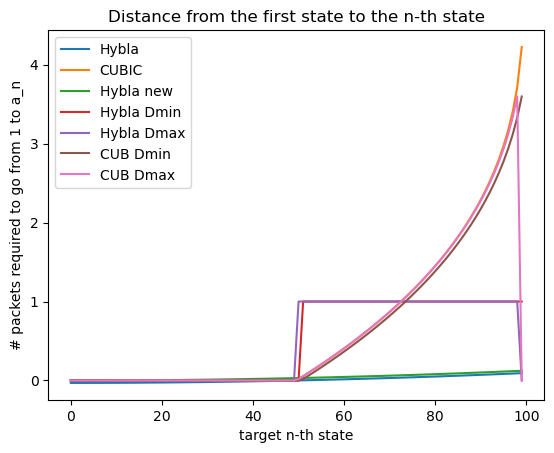

0.0
1.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ccaModels import CCA_MarkovChain_CUBIC_packet, CCA_MarkovChain_Hybla_packet, CCA_MarkovChain_Hybla_packet_new

hyb = CCA_MarkovChain_Hybla_packet_new(packet_err=0.0006,beta=0.5,N=100, C=10, RTT_real = 1, RTT0=0.05)
cub = CCA_MarkovChain_CUBIC_packet(packet_err = 0.0006, beta=0.5,N=100, C=10, RTT_real = 1,alpha=4)
rho = 1/0.05
def newD(a,b):
    return (b*b-a*a)/(2*rho*rho)

a = 1
d = np.zeros(100)
dc = np.zeros(100)
for i,ai in enumerate(hyb.a):
    d[i] = hyb.D(5,ai)
for i,ai in enumerate(cub.a):
    dc[i] = cub.D(5,ai)
plt.title("Distance from the first state to the n-th state")
plt.ylabel("# packets required to go from 1 to a_n")
plt.xlabel("target n-th state")
plt.plot(d,label="Hybla") 
plt.plot(dc,label="CUBIC")
plt.plot(newD(np.ones(len(hyb.a)),hyb.a),label="Hybla new")
plt.plot(hyb.Dmin[50,:], label = "Hybla Dmin")
plt.plot(hyb.Dmax[50,:], label = "Hybla Dmax")
plt.plot(cub.Dmin[50,:], label = "CUB Dmin")
plt.plot(cub.Dmax[50,:], label = "CUB Dmax")
plt.legend()             
plt.show()
print(hyb.Dmin[50,50])
print(hyb.Dmax[50,50])

Error in computing the reduced stationnary distribution.
P had rank 70. Reduced P has rank 11 Zero columns where at indices: [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 24, 25, 26, 27, 28, 29, 30, 31, 32, 17, 18, 19, 20, 21, 22, 12, 13, 14, 15, 8, 9, 10, 5, 6, 3]
W= 1.0, C= 10, RTT=0.1, packet_err= 2
[[0.86466472 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.13533528]
 [0.86466472 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.13533528]
 [0.         0.86466472 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.13533528]
 [0.         0.         0.86466472 0.         0.         0.
  0.         0.         0.         0.     

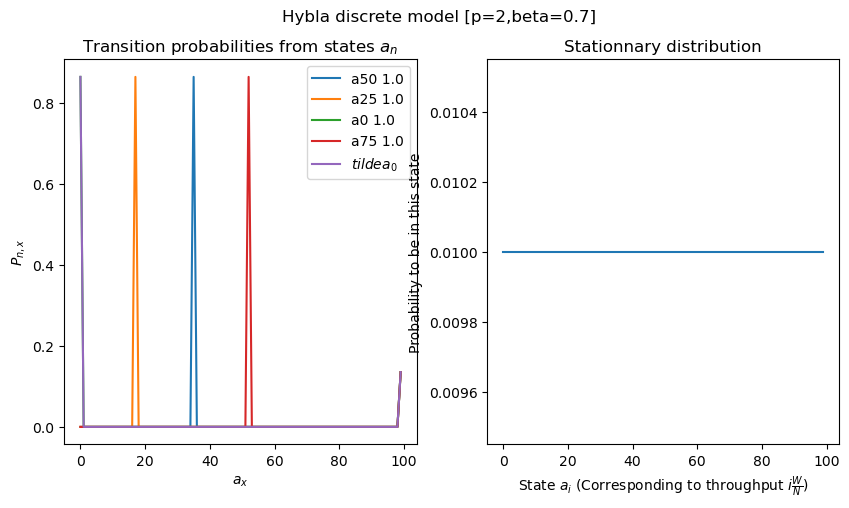

P[0,0]=  0.8646647167633873
P[0,1]=  0.0


In [6]:
p = 2
b = 0.7
R = 0.1
wired = CCA_MarkovChain_Hybla_packet_new(packet_err=p,beta=0.7,N=100,C = 10, RTT_real=R, RTT0=0.025)
wired.avg_throughput()
print(f"Rho is equal to {wired.rho}")
print(f"Average throughput is {wired.ssThroughput}")

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(np.arange(wired.N),wired.P[50,:],label = f"a50 {np.sum(wired.P[50,:])}")
axs[0].plot(np.arange(wired.N),wired.P[25,:],label = f"a25 {np.sum(wired.P[25,:])}")
axs[0].plot(np.arange(wired.N),wired.P[0,:],label = f"a0 {np.sum(wired.P[0,:])}")
axs[0].plot(np.arange(wired.N),wired.P[75,:],label = f"a75 {np.sum(wired.P[75,:])}")
axs[0].plot(np.arange(wired.N),wired.Ptilde[0,:],label = "$tilde a_{0}$")
axs[0].set_title(r"Transition probabilities from states $a_n$")
axs[0].set_ylabel(r"$P_{n,x}$")
axs[0].set_xlabel(r"$a_x$")
axs[0].legend()
axs[1].plot(np.arange(wired.N),wired.pi)
axs[1].set_title(r"Stationnary distribution")
axs[1].set_xlabel(r"State $a_i$ (Corresponding to throughput $i\frac{W}{N}$)")
axs[1].set_ylabel(r'Probability to be in this state')
fig.suptitle(f"Hybla discrete model [p={p},beta={b}]")
plt.show()
print("P[0,0]= ",wired.P[0,0])
print("P[0,1]= ",wired.P[0,1])

In [7]:
wired = CCA_MarkovChain_Hybla_packet_new(packet_err=0.001,beta=0.7,N=100,C = 500, RTT_real = 0.25, RTT0=0.025)
ps = np.flip(np.logspace(-6,-2,3))
# fig, axs = plt.subplots(1, 2, figsize=(13,5))
for i in ps:
    wired.packet_err = i
    wired.update()
    wired.compute_transistion_matrix()
    print(i, wired.Ptilde[96:100,98:100])
    wired.compute_stationnary_distribution()
    #axs[0].plot(np.arange(wired.N),wired.P[20,:],label=f"p={i}")
    #axs[1].plot(np.arange(wired.N),wired.pi,label=f"p={i}")
    #print(i, wired.avg_throughput()*wired.W, wired.W*(wired.beta+1)/2)


# axs[1].set_title(r"Stationnary distribution")
# axs[0].set_title(r"Transition probabilities from $a_{50}$")
# axs[1].set_ylim(-0.01,0.2)
# axs[0].set_ylim(-0.01,0.3)
# #axs[0].set_xlim(10,15)
# axs[1].set_xlabel(r"State $a_i$ (Corresponding to throughput $i\frac{W}{N}$)")
# axs[1].set_ylabel(r'Probability to be in this state')
# axs[1].legend()
# axs[0].legend()
# fig.suptitle(f"Hybla discrete model")
# plt.show()

AttributeError: 'CCA_MarkovChain_Hybla_packet_new' object has no attribute 'compute_transistion_matrix'

Error in computing the stationnary distribution. Negative values in the distribution.


SystemExit: 

UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.

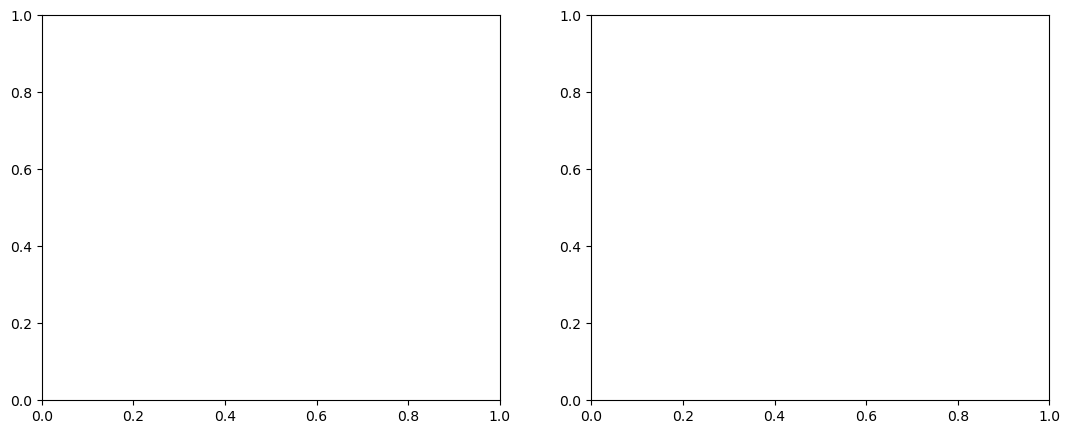

In [8]:
wired = CCA_MarkovChain_CUBIC_packet(packet_err=0.1,beta=0.7,N=300,C = 10, RTT_real = 0.5)
ps = np.logspace(-6,-0.5,4)
fig, axs = plt.subplots(1, 2, figsize=(13,5))
for i in ps:
    wired.packet_err = i
    wired.update()
    wired.compute_stationnary_distribution()
    axs[0].plot(np.arange(wired.N),wired.P[0,:],label=f"p={i}")
    axs[1].plot(np.arange(wired.N),wired.pi,label=f"p={i}")
    print(i, wired.avg_throughput()*wired.W, wired.S[wired.N-1,wired.N-1]/wired.tau[wired.N-1,wired.N-1], wired.pi[wired.N-1])

axs[1].set_title(r"Stationnary distribution")
axs[0].set_title(r"Transition probabilities from $a_{50}$")
axs[1].set_ylim(-0.01,0.2)
axs[0].set_ylim(-0.01,0.3)
#axs[0].set_xlim(10,15)
axs[1].set_xlabel(r"State $a_i$ (Corresponding to throughput $i\frac{W}{N}$)")
axs[1].set_ylabel(r'Probability to be in this state')
axs[1].legend()
axs[0].legend()
fig.suptitle(f"CUBIC discrete model")
plt.show()

In [11]:
hyb = CCA_MarkovChain_Hybla_packet_new(packet_err=0.0,beta=0.7,N=100,C =50, RTT_real = 0.5, RTT0=0.05)
probij = np.zeros((40,3))
ps = np.logspace(-4,-1,40)
probe_states = [0,50,75]
d_mins = np.zeros((40,3))
d_maxs = np.zeros((40,3))
for i,p in enumerate(ps):
    hyb.packet_err = p
    hyb.update()
    hyb.compute_stationnary_distribution()
    for j,start in enumerate(probe_states):
        probij[i,j] = hyb.Ptilde[start,start+1]
        d_mins[i,j] = hyb.Dmin[start,start+1]
        d_maxs[i,j] = hyb.Dmax[start,start+1]
        if i%20==0:
            a = hyb.a[start]
            b = (start+1)*hyb.W/hyb.N
            U = (b-a)/hyb.rho**2
            Uf = np.floor(U)
            print(f"{a} to {b}. U ={U} Uf={Uf} D = {int(U*(a+Uf*hyb.rho**2)-hyb.rho**2*(Uf+Uf**2)/2)} = {hyb.D(hyb.a[start],(start+1)*hyb.W/hyb.N)}")
#also do a plot for the nmin and nmax starting from these 3 states,
fig, axs = plt.subplots(1, 2, figsize=(11,4))
for a,b in enumerate(probe_states):
    axs[1].plot(ps,d_mins[:,a],label = f"$Dmin({b},{b})$")
    axs[1].plot(ps,d_maxs[:,a],label = f"$Dmax({b},{b})$")
    axs[0].plot(ps,probij[:,a], label = f"{b}")
axs[0].semilogx()
axs[0].set_title(f"Probability to grow from state i to i+1")
axs[0].set_xlabel("p (packet loss probability)")
axs[0].set_ylabel("$P_{i,i+1}$")
axs[0].legend()
axs[1].semilogx()
axs[1].legend()

Error in computing the stationnary distribution. Negative values in the distribution.


SystemExit: 

UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.

In [12]:
err_rates = np.logspace(-4,0,20)
err_ss = 1e-1
bandwidths = [10,50,100]
RTT = 0.05
N = int(1000*0.025/np.sqrt(2))
throughputs = np.zeros([len(bandwidths),len(err_rates)])
sdistr = np.zeros([len(bandwidths),N])
for k,C in enumerate(bandwidths):
    sdistr[k,:] = CCA_MarkovChain_Hybla_bit(packet_err=err_ss,beta=0.7,N=N,C = C,RTT_real=RTT, RTT0=0.025).compute_stationnary_distribution()
    for i, l in enumerate(err_rates):
        wireless = CCA_MarkovChain_Hybla_bit(packet_err=l,beta=0.7,N=N,C = C,RTT_real=RTT, RTT0=0.025)
        throughputs[k,i] = wireless.sscwnd()
fig, axs = plt.subplots(1, 2, figsize=(13,5))
for k,C in enumerate(bandwidths):
    axs[0].plot(err_rates,throughputs[k,:], label = f"C = {C}Mb/s,W={RTT*C}")
    axs[1].plot(np.arange(wireless.N),sdistr[k], label = f"C = {C}Mb/s,W={RTT*C}")
    axs[1].set_title(f"Hybla Discrete Stationnary distribution, RTT = {RTT}, p={err_ss}")
    axs[1].legend()
axs[0].semilogx()
axs[0].legend()
axs[0].grid()
axs[0].set_title(f"Hybla Discrete average throughputs, RTT = {RTT}")
axs[0].set_xlabel(r"packet loss probability $p$")
axs[0].set_ylabel(r'sscwnd')
plt.show()

NameError: name 'CCA_MarkovChain_Hybla_bit' is not defined

Average throughput is 26.07488198779203


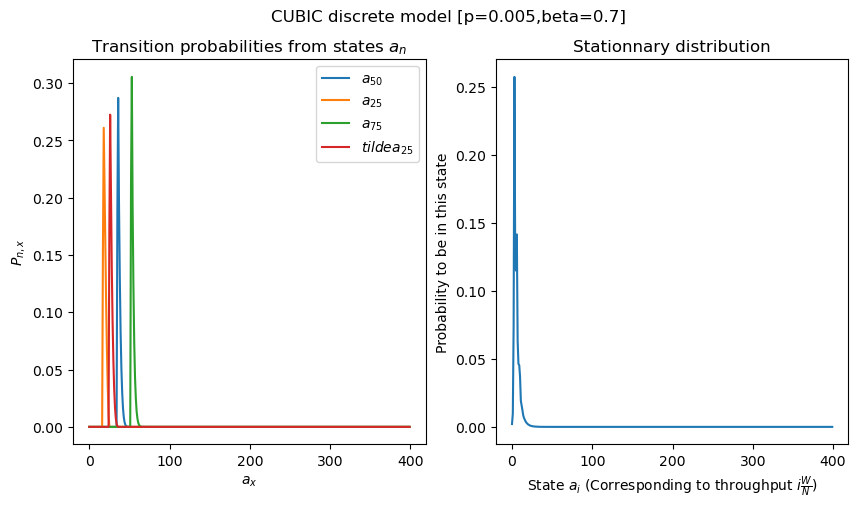

In [2]:
p = 0.005
b = 0.7
wired = CCA_MarkovChain_CUBIC_packet(packet_err=p,beta=b,N=400,C =10000, RTT_real = 0.21)
wired.avg_throughput()
print(f"Average throughput is {wired.ssThroughput*wired.W}")

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(np.arange(wired.N),wired.P[50,:],label = "$a_{50}$")
axs[0].plot(np.arange(wired.N),wired.P[25,:],label = "$a_{25}$")
axs[0].plot(np.arange(wired.N),wired.P[75,:],label = "$a_{75}$")
axs[0].plot(np.arange(wired.N),wired.Ptilde[25,:],label = "$tilde a_{25}$")
axs[0].set_title(r"Transition probabilities from states $a_n$")
axs[0].set_ylabel(r"$P_{n,x}$")
axs[0].set_xlabel(r"$a_x$")
axs[0].legend()
axs[1].plot(np.arange(wired.N),wired.pi)
axs[1].set_title(r"Stationnary distribution")
axs[1].set_xlabel(r"State $a_i$ (Corresponding to throughput $i\frac{W}{N}$)")
axs[1].set_ylabel(r'Probability to be in this state')
fig.suptitle(f"CUBIC discrete model [p={p},beta={b}]")
plt.show()

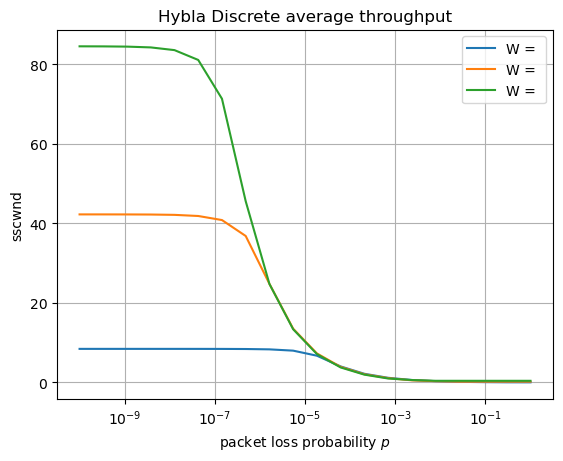

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ccaModels import CCA_MarkovChain_CUBIC_packet, CCA_MarkovChain_Hybla_packet, CCA_MarkovChain_Hybla_packet_new, CCA_MarkovChain_Hybla_bit

err_rates = np.logspace(-10,0,20)
throughputs = np.zeros([3,len(err_rates)])
for k,C in enumerate([100,500,1000]):
    for i, l in enumerate(err_rates):
        wireless = CCA_MarkovChain_Hybla_bit(packet_err=l,beta=0.7,N=100,C = C,RTT_real=0.1, RTT0 = 0.05, MTU=1500)
        throughputs[k,i] = wireless.sscwnd()

plt.plot(err_rates,throughputs[0,:], label = "W = ")
plt.plot(err_rates,throughputs[1,:], label = "W = ")
plt.plot(err_rates,throughputs[2,:], label = "W = ")
plt.semilogx()
plt.legend()
plt.grid()
plt.title(r"Hybla Discrete average throughput")
plt.xlabel(r"packet loss probability $p$")
plt.ylabel(r'sscwnd')
plt.show()

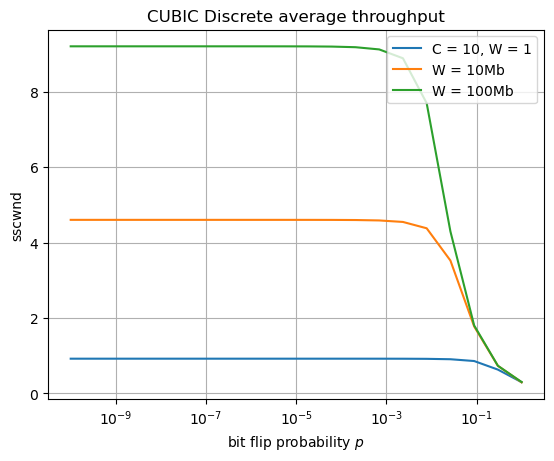

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ccaModels import CCA_MarkovChain_CUBIC_bit

# 500Kbps = 62.5KBps
# 1 packet = 1500B
# 500Kbps = 41.6 packets per second
# with rtt = 0.1, cwnd_max = 4.16 packets = 6.24KB = 49.92Kb
err_rates = np.logspace(-10,0,20)
throughputs = np.zeros([3,len(err_rates)])
for k,C in enumerate([10,50,100]):
    for i, l in enumerate(err_rates):
        wireless = CCA_MarkovChain_CUBIC_bit(packet_err=l,beta=0.7,N=100,C = C,RTT_real=0.1, MTU = 1500)
        throughputs[k,i] = wireless.sscwnd()

plt.plot(err_rates,throughputs[0,:], label = "C = 10, W = 1")
plt.plot(err_rates,throughputs[1,:], label = "W = 10Mb")
plt.plot(err_rates,throughputs[2,:], label = "W = 100Mb")
plt.semilogx()
plt.legend()
plt.grid()
plt.title(r"CUBIC Discrete average throughput")
plt.xlabel(r"bit flip probability $p$")
plt.ylabel(r'sscwnd')
plt.show()

How do they depend on different RTTs?

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Error in computing the reduced stationnary distribution.
P had rank 70. Reduced P has rank 70 Zero columns where at indices: []
W= 1.5, C= 50, RTT=0.03, packet_err= 0.00030493728293872613
[[3.32616297e-05 2.07368501e-05 1.92638890e-05 ... 5.47669905e-05
  5.43899839e-05 9.95826306e-01]
 [3.32616297e-05 2.07368501e-05 1.92638890e-05 ... 5.47669905e-05
  5.43899839e-05 9.95826306e-01]
 [0.00000000e+00 2.17464194e-05 1.23407197e-04 ... 5.53791566e-05
  5.49922849e-05 9.95611819e-01]
 ...
 [0.000000

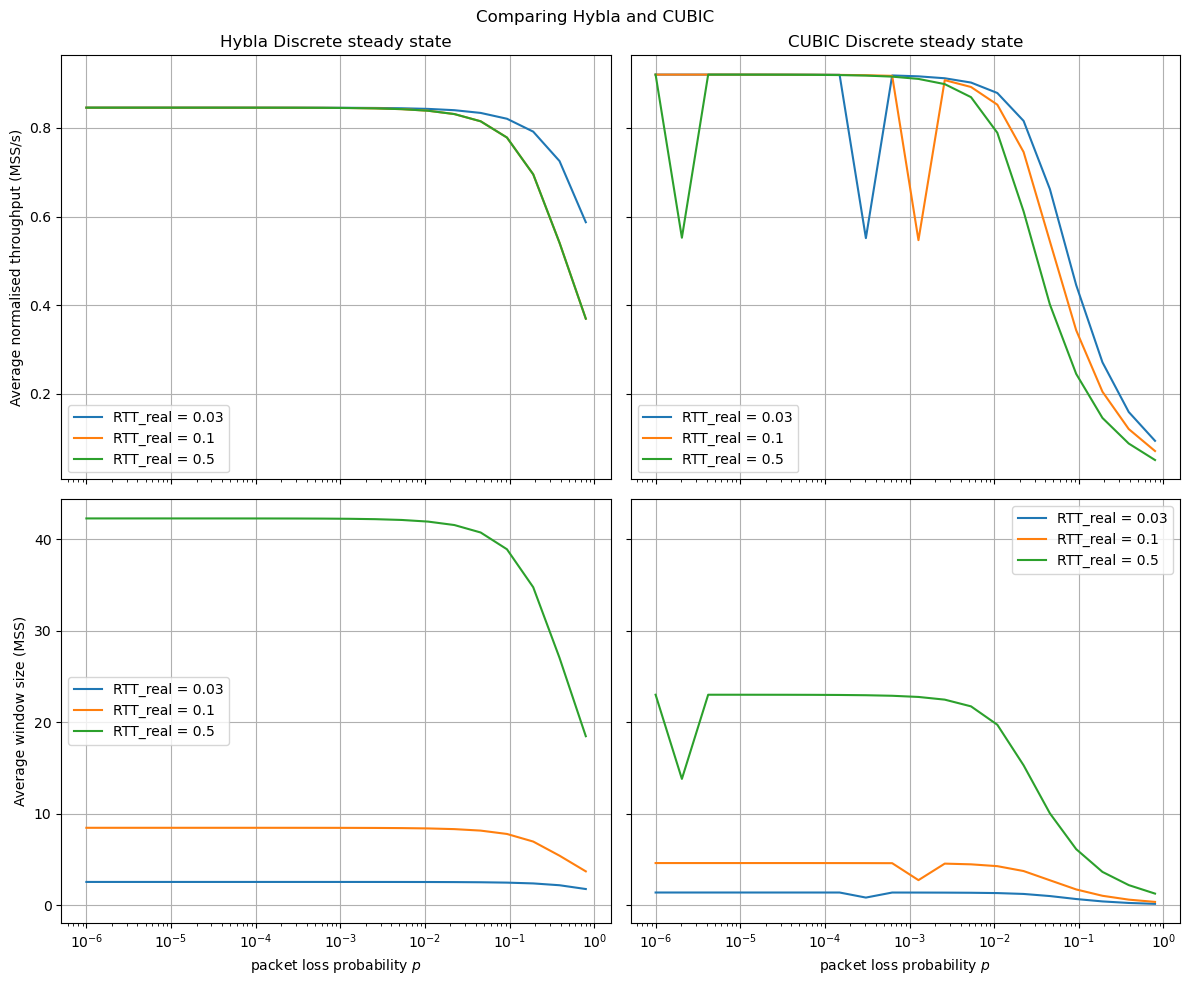

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ccaModels import CCA_MarkovChain_CUBIC_packet, CCA_MarkovChain_Hybla_packet, CCA_MarkovChain_Hybla_packet_new

err_rates = np.logspace(-6,-0.1,20)
RTTs = [0.03, 0.1,0.5]
throughputs = np.zeros([len(RTTs),len(err_rates),4])

for k,R in enumerate(RTTs):
    for i, l in enumerate(err_rates):
        wireless = CCA_MarkovChain_Hybla_packet_new(packet_err=l,beta=0.7 ,N=100, C = 100, RTT_real=R, RTT0=0.05)
        cubic = CCA_MarkovChain_CUBIC_packet(packet_err=l,beta=0.7,N=100,C = 50, RTT_real=R)
        throughputs[k,i,0] = wireless.avg_throughput()
        throughputs[k,i,1] = cubic.avg_throughput()
    throughputs[k,:,2] = throughputs[k,:,0]*wireless.W
    throughputs[k,:,3] = throughputs[k,:,1]*cubic.W

fig, axs = plt.subplots(2, 2, figsize=(12,10),sharex=True, sharey="row")
for k,R in enumerate(RTTs):
    axs[0,0].plot(err_rates,throughputs[k,:,0], label = f"RTT_real = {R}")
    axs[0,1].plot(err_rates,throughputs[k,:,1], label = f"RTT_real = {R}")
    axs[1,0].plot(err_rates,throughputs[k,:,2], label = f"RTT_real = {R}")
    axs[1,1].plot(err_rates,throughputs[k,:,3], label = f"RTT_real = {R}")
axs[0,0].semilogx()
axs[0,0].legend()
axs[0,0].grid()
axs[0,0].set_title(r"Hybla Discrete steady state")
axs[0,0].set_ylabel(r'Average normalised throughput (MSS/s)')
axs[0,1].semilogx()
axs[0,1].legend()
axs[0,1].grid()
axs[0,1].set_title(r"CUBIC Discrete steady state")
axs[1,0].semilogx()
axs[1,0].legend()
axs[1,0].grid()
axs[1,0].set_xlabel(r"packet loss probability $p$")
axs[1,0].set_ylabel(r'Average window size (MSS)')
axs[1,1].semilogx()
axs[1,1].legend()
axs[1,1].grid()
axs[1,1].set_xlabel(r"packet loss probability $p$")
fig.suptitle("Comparing Hybla and CUBIC")
fig.tight_layout()
plt.show()

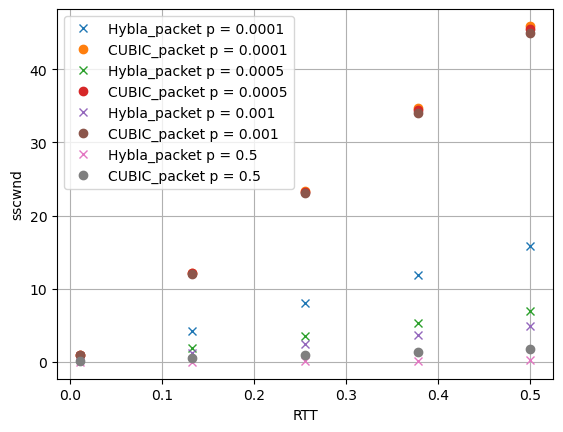

In [7]:
rtts = np.linspace(0.01,0.5,5)
packet_error = np.array([0.0001,0.0005,0.001,0.5])
throughputs = np.zeros((2*len(packet_error),len(rtts)))
for k, err in enumerate(packet_error):
    for i, rtt in enumerate(rtts):
        wireless = CCA_MarkovChain_Hybla_bit(packet_err=err,beta=0.7,N=100,C = 100,RTT_real=rtt, RTT0=0.05)
        cubic = CCA_MarkovChain_CUBIC_bit(packet_err=err,beta=0.7,N=100,C = 100,RTT_real=rtt)
        throughputs[2*k,i] = wireless.sscwnd()
        throughputs[2*k+1,i] = cubic.sscwnd()
for k,err in enumerate(packet_error):
    plt.plot(rtts,throughputs[2*k,:], label = "Hybla_packet p = {}".format(err), linestyle = "none", marker = "x")
    plt.plot(rtts,throughputs[2*k+1,:], label = "CUBIC_packet p = {}".format(err), linestyle = "none", marker = "o")
plt.legend()
plt.grid()
plt.xlabel(r"RTT")
plt.ylabel(r'sscwnd')
plt.show()

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets


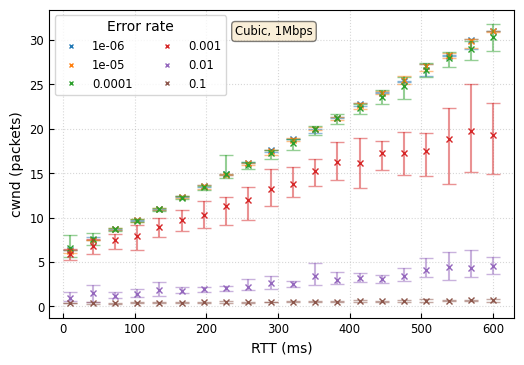

In [7]:
import matplotlib.colors as mcolors
import os, re

# I want to plot the ns-3 results with confidence intervals
def average_cwnd(file_path):
    data = np.loadtxt(file_path)
    return np.average(data[:,1])


def get_error(file_path):
    match = re.search(r"[ac](0\.\d+?)-", file_path)
    if not match: 
        print(f"Error: Error not found in {file_path}")
        return None
    return float(match.group(1))

def get_rtt(file_path):
    match = re.search(r"-(\d+?\.\d+?)ms",file_path)
    if not match: 
        print(f"Error: Delay not found in {file_path}")
        return None
    return 2*float(match.group(1))
def get_run(file_path):
    match = re.search(r"-(\d+?)-",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None
    return int(match.group(1))
def get_bandwidth(file_path):
    match = re.search(r"-(\d+?[GMK]bps)-",file_path)
    if not match: 
        print(f"Error: Bandwidth not found in {file_path}")
        return None
    return match.group(1)
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 400*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "1Mbps"
bdw = 1e6
cca = "Cubic"
folder_path = "./ns3_results/03.08.23/cubic2/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))


fig, ax = plt.subplots(1,1,figsize=(6,4))
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 600ms is ", 1e6*0.6/mtu, "packets")

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = rtt , np.average(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
#ax.plot(points[:,0],bdw*points[:,0]/1000/mtu,linestyle='--',color='black', alpha = 0.5,label="BDP")
#ax.set_ylim(0, 35)
ax.text(0.40, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()    
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

12.5